In [ ]:
# default_exp stats

# stats

> Módulo que contém os algoritmos para detecção de anomalias em dados univariados.

* Robust ZScore
* Tukey

In [ ]:
#hide
from nbdev.showdoc import *

## Pré-requisitos

In [ ]:
#export
import numpy as np

## MAD - Robust ZScore

Para detecção de anomalias o Zscore Robusto é mais adequado que o Zscore padrão, uma vez que a media pode ser fortemente influenciada por outliers.

In [ ]:
#export
class MAD():
    ''' 
    classe responsavel por implemetar zscore robusto
    para detecção de anomalias.
    '''
    def __init__(self, only_low_values=False):
        self.only_low_values= only_low_values
        
    
    def __mad(self, x):
        ''' retorna o MAD(Median Absolute Deviation) para cada valor de **x** '''
        return (x - self.median)/self.mad
    
    def fit(self, x):
        ''' Calcula os parametros do Zscore Robusto(Median/MAD) para os valores de **x** '''
        self.mad = 1.4826*np.nanmedian(np.abs(x - np.nanmedian(x)))
        self.median = np.nanmedian(x)

    def predict(self, x, m=3.0):
        ''' retorna se os valores de **x** são outliers '''
        assert m > 0
        assert len(x) > 0
        
        # Calcular MAD
        mad = self.__mad(x)
        
        if self.only_low_values: # Retornando anomalias apenas para os valores menores que -m
            return x[mad < -m]
        else:                    # MAD padrão, valores de anomalias maiores que m ou menores que -m
            return x[np.abs(mad) > m]
        
    def decision_function(self, x):
        ''' retorna se os valores de mad para cada valor em **x**'''
        mad = self.__mad(x)
        return np.abs(mad)
    
    def fit_predict(self, x, m=3.0):
        ''' Calcula os parametros e retorno os valores
            de **x** que são outliers'''
        self.fit(x)
        return self.predict(x, m)

In [ ]:
show_doc(MAD.fit)

<h4 id="MAD.fit" class="doc_header"><code>MAD.fit</code><a href="__main__.py#L15" class="source_link" style="float:right">[source]</a></h4>

> <code>MAD.fit</code>(**`x`**)

Calcula os parametros do Zscore Robusto(Median/MAD) para os valores de **x** 

In [ ]:
show_doc(MAD.predict)

<h4 id="MAD.predict" class="doc_header"><code>MAD.predict</code><a href="__main__.py#L20" class="source_link" style="float:right">[source]</a></h4>

> <code>MAD.predict</code>(**`x`**, **`m`**=*`3.0`*)

retorna se os valores de **x** são outliers 

In [ ]:
show_doc(MAD.fit_predict)

<h4 id="MAD.fit_predict" class="doc_header"><code>MAD.fit_predict</code><a href="__main__.py#L38" class="source_link" style="float:right">[source]</a></h4>

> <code>MAD.fit_predict</code>(**`x`**, **`m`**=*`3.0`*)

Calcula os parametros e retorno os valores
de **x** que são outliers

In [ ]:
show_doc(MAD.decision_function)

<h4 id="MAD.decision_function" class="doc_header"><code>MAD.decision_function</code><a href="__main__.py#L33" class="source_link" style="float:right">[source]</a></h4>

> <code>MAD.decision_function</code>(**`x`**)

retorna se os valores de mad para cada valor em **x**

### Uso

In [ ]:
# test array
x = np.random.randn(1000)
x[:5]

array([-0.82690206, -1.88571169, -0.51696294, -0.42130458,  0.76463908])

In [ ]:
c = 0
for i in range(10000):
    x = np.random.randn(100000)
    mad = MAD()
    c += len(mad.fit_predict(x))
    
print(c/10000)

270.0118


In [ ]:
mad = MAD()
mad.fit_predict(x)

array([ 3.27592621, -3.12483499, -3.07621986, -4.35509144, -3.11763292,
        3.02535581, -3.13180615, -3.36548647, -3.17178004,  3.20330791,
       -3.25650258,  3.23529732,  3.005557  , -3.01793514, -3.23464314,
        3.72496206,  3.67438503,  3.30450105, -3.88702698, -3.38811252,
       -3.09784111, -3.21788054,  3.44247211,  3.20910071,  3.11806897,
        3.0611691 ,  3.10271219, -3.25680801,  3.45402775,  3.11746403,
       -3.14437312,  4.14825567, -3.23858757,  3.40011544, -3.29404252,
       -3.65647837, -3.49607383, -3.09603364, -3.37893962, -3.00973155,
       -3.51254726, -4.43972934, -3.16725637,  3.99745325, -3.20749375,
        3.05409709,  3.36455888, -3.10022827,  3.48807505, -3.16800588,
       -3.43319907,  3.0436603 , -3.00018575, -3.4209345 , -3.2077666 ,
       -3.3380403 , -3.12287003, -3.93098243,  3.06720511, -3.26746365,
       -3.26191382, -3.01689676,  3.01441082, -3.0333311 ,  3.31513357,
       -3.00778245, -3.67877704, -3.07527578,  3.66773473, -3.11

In [ ]:
mad = MAD(only_low_values=True)
mad.fit_predict(x)

array([-3.12483499, -3.07621986, -4.35509144, -3.11763292, -3.13180615,
       -3.36548647, -3.17178004, -3.25650258, -3.01793514, -3.23464314,
       -3.88702698, -3.38811252, -3.09784111, -3.21788054, -3.25680801,
       -3.14437312, -3.23858757, -3.29404252, -3.65647837, -3.49607383,
       -3.09603364, -3.37893962, -3.00973155, -3.51254726, -4.43972934,
       -3.16725637, -3.20749375, -3.10022827, -3.16800588, -3.43319907,
       -3.00018575, -3.4209345 , -3.2077666 , -3.3380403 , -3.12287003,
       -3.93098243, -3.26746365, -3.26191382, -3.01689676, -3.0333311 ,
       -3.00778245, -3.67877704, -3.07527578, -3.11339274, -3.0771261 ,
       -3.31498754, -3.01949437, -3.52037861, -3.08269846, -3.64618945,
       -3.04813936, -3.33648976, -3.26850786, -3.18492479, -3.16386913,
       -3.16648756, -3.71270225, -3.01268043, -3.35499748, -3.0513702 ,
       -3.23079039, -3.20146261, -3.22760268, -3.3918368 , -3.16001693,
       -3.10569312, -3.29375012, -3.01940572, -3.42432646, -3.52

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns; sns.set(style='whitegrid')

<AxesSubplot:>

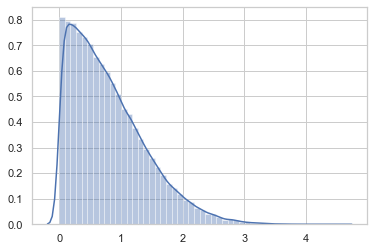

In [ ]:
sns.distplot(mad.decision_function(x))

## Tukey

In [ ]:
len(mad.fit_predict(x))

156

In [ ]:
#export
class Tukey():
    ''' 
    classe responsavel por implemetar Tukey Method
    para detecção de anomalias.
    '''

    def __init__(self, only_low_values=False):
        self.only_low_values = only_low_values
        self.iqr = None
        self.q1 = None
        self.q2 = None
        self.q3 = None
    
    def fit(self, x):
        ''' Calcula os parametros do Tukey(Q1,Q2,Q3) para os valores de **x** '''
        x = np.sort(x) 
        n = len(x)//2
    
        # calculando os quartiles
        self.q1 = np.nanmedian(x[:n])
        self.q2 = np.nanmedian(x)
        self.q3 = np.nanmedian(x[n:])
    
        self.iqr = self.q3 - self.q1
        self.min = self.q1 - 1.5*self.iqr
        self.max = self.q3 + 1.5*self.iqr
        
    def predict(self, x):
        ''' retorna se os valores de **x** são outliers '''
        if self.only_low_values:
            return x[(x < self.min)]
        else:
            return x[(x < self.min) | (x >= self.max)]
   
    def decision_function(self, x):
        ''' retorna o score para os valores de **x** '''
        score = np.zeros(len(x))
        score[x < self.min] = np.abs(x[x < self.min] - self.min)
        score[x > self.max] = np.abs(x[x > self.max] - self.max)
        
        return np.log(score + 1)
    
    def fit_predict(self, x):
        ''' Calcula os parametros e retorno os valores
            de **x** que são outliers'''
        self.fit(x)
        return self.predict(x)

In [ ]:
show_doc(Tukey.fit)

<h4 id="Tukey.fit" class="doc_header"><code>Tukey.fit</code><a href="__main__.py#L15" class="source_link" style="float:right">[source]</a></h4>

> <code>Tukey.fit</code>(**`x`**)

Calcula os parametros do Tukey(Q1,Q2,Q3) para os valores de **x** 

In [ ]:
show_doc(Tukey.predict)

<h4 id="Tukey.predict" class="doc_header"><code>Tukey.predict</code><a href="__main__.py#L29" class="source_link" style="float:right">[source]</a></h4>

> <code>Tukey.predict</code>(**`x`**)

retorna se os valores de **x** são outliers 

In [ ]:
show_doc(Tukey.decision_function)

<h4 id="Tukey.decision_function" class="doc_header"><code>Tukey.decision_function</code><a href="__main__.py#L36" class="source_link" style="float:right">[source]</a></h4>

> <code>Tukey.decision_function</code>(**`x`**)

retorna o score para os valores de **x** 

### Tukey Uso

In [ ]:
x = np.arange(10)

tu = Tukey()
tu.fit_predict(x)

array([], dtype=int64)

In [ ]:
x[0] = -100
x[9] = 100

tu = Tukey()
tu.fit_predict(x)

array([-100,  100])

In [ ]:
tu = Tukey(only_low_values=True)
tu.fit_predict(x)

array([-100])